In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [4]:
customerSeg = pd.read_csv('customer_segmentation.csv',delimiter = ';')
pd.set_option('display.max_rows', 1070)
customerSeg

,customer_id,age,income,spending_score,visits_per_month
0,CUST1000,56,120186,55,9
1,CUST1001,69,49674,80,1
2,CUST1002,46,61271,62,8
3,CUST1003,32,88688,30,6
4,CUST1004,60,126076,55,6
5,CUST1005,25,16062,16,18
6,CUST1006,38,65448,12,17
7,CUST1007,56,110462,17,12
8,CUST1008,36,62915,16,6
9,CUST1009,40,19632,12,8


In [114]:
#Removing rows with null values
customerSeg.dropna(axis = 0, how = 'all')

,customer_id,age,income,spending_score,visits_per_month
0,CUST1000,56,120186,55,9
1,CUST1001,69,49674,80,1
2,CUST1002,46,61271,62,8
3,CUST1003,32,88688,30,6
4,CUST1004,60,126076,55,6
5,CUST1005,25,16062,16,18
6,CUST1006,38,65448,12,17
7,CUST1007,56,110462,17,12
8,CUST1008,36,62915,16,6
9,CUST1009,40,19632,12,8


In [115]:
#I've removed these columns: customer_id, age and visits_per_month
customer_drop = customerSeg.drop(columns = ['customer_id', 'age','visits_per_month'])
customer_drop

,income,spending_score
0,120186,55
1,49674,80
2,61271,62
3,88688,30
4,126076,55
5,16062,16
6,65448,12
7,110462,17
8,62915,16
9,19632,12


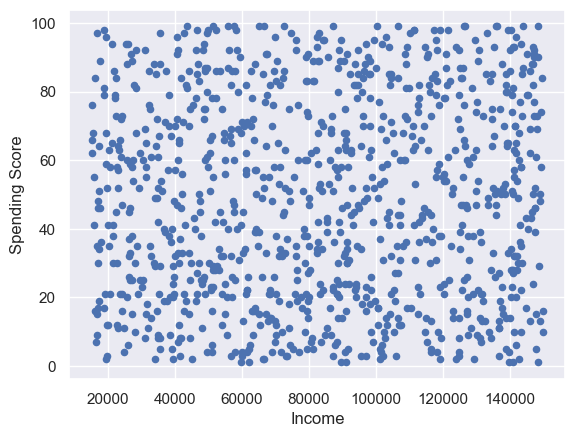

In [116]:
# Creating scatter plot 
ax = customer_drop.plot(kind='scatter', x='income', y='spending_score')

ax.set_xlabel('Income')
ax.set_ylabel('Spending Score')
plt.show()


In [117]:
#creating wss(within-cluster-sum-of-squares)
wcss = []

# A loop is created for different numbers of clusters (from 1 to 10)
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(customer_drop)
    
    wcss.append(kmeans.inertia_)

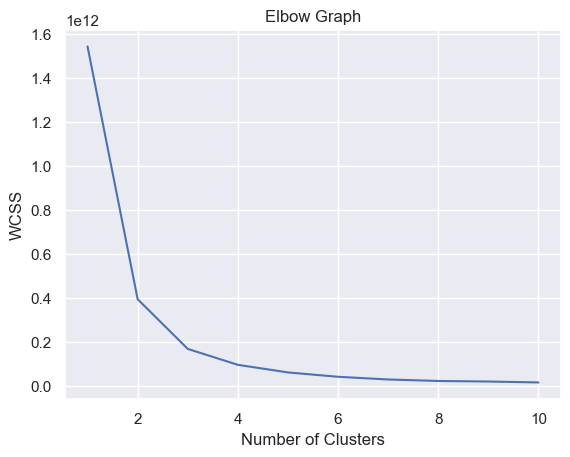

In [118]:
#Creating an elbow graph 
sns.set()
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

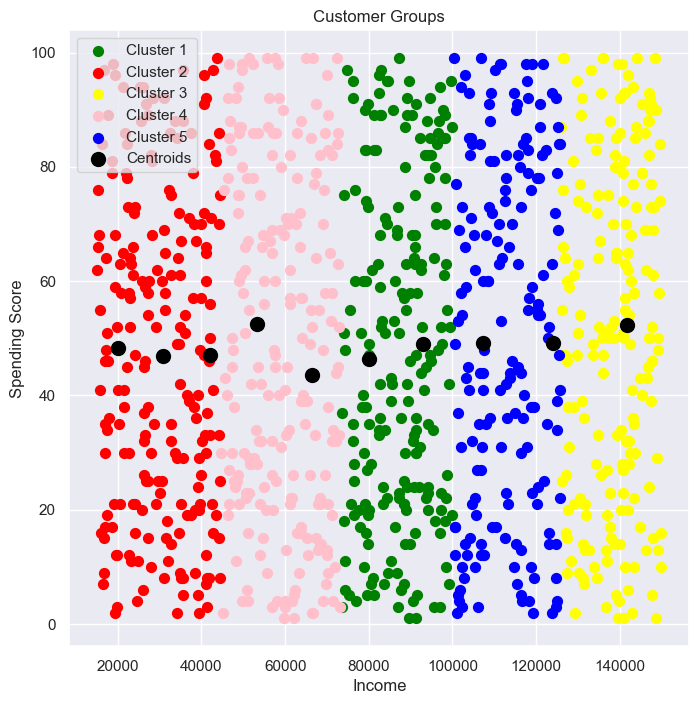

In [120]:
# creating 1D array or Series 
plt.figure(figsize=(8, 8))

# Scatter plots for each cluster
for i, color, label in zip(range(5), ['green', 'red', 'yellow', 'pink', 'blue'], ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']):
    mask = (Y == i)
    plt.scatter(customer_drop.iloc[mask, 0], customer_drop.iloc[mask, 1], s=50, c=color, label=label)

# Creating centroids for scatter plot 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()